In [78]:
%matplotlib inline
import mediapipe as mp
import cv2
import time
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image


import warnings
warnings.filterwarnings('ignore')

# Загрузка модели
model = YOLO('yolo11n-pose.pt')  # load an official model

points = 17
path_train = "DATASET/TRAIN/" # Путь к датасету
path_test = "DATASET/TEST/" # Путь к датасету

In [79]:
Key_Points_YOLO = ['Nose', 'LeftEye', 'RightEye', 'LeftEar', 'RightEar', 
                   'LeftShoulder', 'RightShoulder', 'LeftElbow', 'RightElbow', 
                   'LeftWrist', 'RightWrist', 'LeftHip', 'RightHip', 
                   'LeftKnee', 'RightKnee', 'LeftAnkle', 'RightAnkle'
                  ]

In [80]:
 # Создание пустого датафрейма для последующего сохраниения ключевых точек
def init_data(Key_Points):
    data = []
    data.append("FileName")
    i = 0
    for p in range(points):
        x = Key_Points[i]
        data.append(x + "_x")
        data.append(x + "_y")
        i += 1
    data.append("target")
    data = pd.DataFrame(columns = data) 
    return data

In [81]:
# Создание датасета каркасных моделей (набора ключевых точек и метки - названия позы)
def create_df_pos(path, name_file):
    data = init_data(Key_Points_YOLO)
    count = 0
    target = []
    for dr in os.listdir(path): # Перебор папок с видами поз
        for image in os.listdir(path + "/" +dr): # Перебор файлов в каждой папке
            temp = []
            img = cv2.imread(path + "/" + dr + "/" + image)
            # Копирование и конвертация изображения в RGB
            imageWidth, imageHeight = img.shape[:2]
            imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Преобразование BGR модели OpenCV в RGB модель, с которой работает YOLO
            # Обнаружение позы            
            results = model(imgRGB)  # predict on an image # Построение скелетной модели
            # Извлечение результатов
            for result in results[0]:
                xy = result.keypoints.xy  # x and y coordinates
                xyn = result.keypoints.xyn  # normalized
                kpts = result.keypoints.data  # x, y, visibility (if available)
            keypoints = np.array(xy[0])
            normal_keypoints = np.array(xyn[0])
            temp = temp + [path + dr + "/" + image]
            for i in range(len(normal_keypoints)):
                temp = temp + [normal_keypoints[i][0], normal_keypoints[i][1]] # Добавление ключевых точек
            temp = temp + [dr] # Добавление метки
            data.loc[count] = temp # Запись в дата фрейм
            count +=1
    data.to_csv(name_file) # Запись датафрейма ключевых точек в файл
    return data

In [82]:
# Построение диаграммы распределения скелетных моделей по классам
def paint_bar(data, s):
    df = data['target'].value_counts()
    label = list(df.index)
    counts = list(df.values)
    # Построение диаграммы распределения
    plt.bar(label, counts)
    plt.title('Распределение классов поз в ' + s + ' наборе')

In [83]:
# Построение датафрейма скелетных моделей обучающего набора
time_start = time.time()
data_tr = create_df_pos(path_train, 'dataset_train_yolo.csv')
time_end = time.time()
print('time: ', time_end-time_start)
data_tr.head()


0: 448x640 1 person, 250.7ms
Speed: 50.3ms preprocess, 250.7ms inference, 20.6ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 person, 85.6ms
Speed: 6.0ms preprocess, 85.6ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)

0: 480x640 1 person, 179.5ms
Speed: 5.4ms preprocess, 179.5ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 448x640 1 person, 65.0ms
Speed: 3.2ms preprocess, 65.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)

0: 320x640 1 person, 201.9ms
Speed: 3.2ms preprocess, 201.9ms inference, 1.8ms postprocess per image at shape (1, 3, 320, 640)

0: 384x640 1 person, 117.4ms
Speed: 3.2ms preprocess, 117.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 448x640 1 person, 62.1ms
Speed: 3.0ms preprocess, 62.1ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)

0: 640x640 2 persons, 122.9ms
Speed: 6.3ms preprocess, 122.9ms inference, 2.0ms postprocess per image at sh

,FileName,Nose_x,Nose_y,LeftEye_x,LeftEye_y,RightEye_x,RightEye_y,LeftEar_x,LeftEar_y,RightEar_x,...,RightHip_y,LeftKnee_x,LeftKnee_y,RightKnee_x,RightKnee_y,LeftAnkle_x,LeftAnkle_y,RightAnkle_x,RightAnkle_y,target
0,DATASET/TRAIN/downdog/00000128.jpg,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.268368,0.499210,0.433478,0.798009,0.484510,0.351382,0.663872,0.899398,0.750213,downdog
1,DATASET/TRAIN/downdog/00000129.jpg,0.000000,0.000000,0.34278,0.601994,0.0,0.0,0.382856,0.533665,0.0,...,0.317290,0.637277,0.425779,0.682385,0.462722,0.769720,0.745646,0.845588,0.735596,downdog
2,DATASET/TRAIN/downdog/00000130.jpg,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.243815,0.616272,0.489505,0.611070,0.468775,0.562173,0.673614,0.562906,0.655936,downdog
3,DATASET/TRAIN/downdog/00000131.jpg,0.624878,0.570141,0.62317,0.554149,0.0,0.0,0.619724,0.452377,0.0,...,0.128386,0.414862,0.306516,0.574514,0.305731,0.265514,0.551216,0.534264,0.542472,downdog
4,DATASET/TRAIN/downdog/00000132.png,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.284218,0.413127,0.433869,0.536902,0.422223,0.409344,0.759271,0.636587,0.730350,downdog


<class 'pandas.core.frame.DataFrame'>
Index: 1080 entries, 0 to 1079
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FileName         1080 non-null   object 
 1   Nose_x           1080 non-null   float32
 2   Nose_y           1080 non-null   float32
 3   LeftEye_x        1080 non-null   float32
 4   LeftEye_y        1080 non-null   float32
 5   RightEye_x       1080 non-null   float32
 6   RightEye_y       1080 non-null   float32
 7   LeftEar_x        1080 non-null   float32
 8   LeftEar_y        1080 non-null   float32
 9   RightEar_x       1080 non-null   float32
 10  RightEar_y       1080 non-null   float32
 11  LeftShoulder_x   1080 non-null   float32
 12  LeftShoulder_y   1080 non-null   float32
 13  RightShoulder_x  1080 non-null   float32
 14  RightShoulder_y  1080 non-null   float32
 15  LeftElbow_x      1080 non-null   float32
 16  LeftElbow_y      1080 non-null   float32
 17  RightElbow_x     10

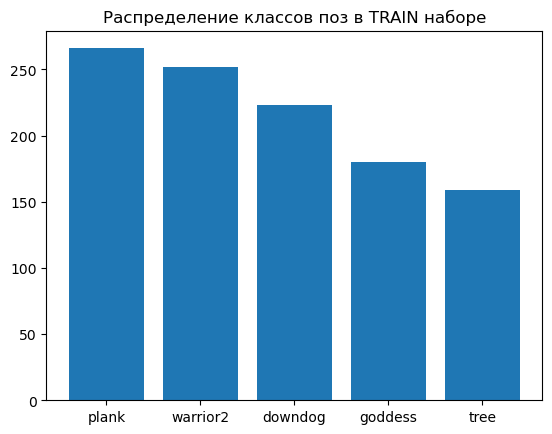

In [84]:
# Вывод характеристик датафрейма скелетных моделей обучающего набора
print(data_tr.info())
print(data_tr['target'].value_counts())
paint_bar(data_tr, 'TRAIN')
# Отображение гистограммы
plt.show()

In [76]:
# Построение датафрейма скелетных моделей тестового набора
time_start = time.time()
data_te = create_df_pos(path_test, 'dataset_test_yolo.csv')
time_end = time.time()
print('time: ', time_end-time_start)
data_te.head()


0: 384x640 1 person, 60.4ms
Speed: 2.6ms preprocess, 60.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 47.4ms
Speed: 2.6ms preprocess, 47.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 480x640 1 person, 53.3ms
Speed: 2.4ms preprocess, 53.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 448x640 1 person, 49.9ms
Speed: 2.4ms preprocess, 49.9ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

0: 384x640 1 person, 46.8ms
Speed: 2.2ms preprocess, 46.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 448x640 1 person, 50.6ms
Speed: 2.3ms preprocess, 50.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 person, 49.8ms
Speed: 1.9ms preprocess, 49.8ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

0: 416x640 1 person, 48.7ms
Speed: 2.0ms preprocess, 48.7ms inference, 0.9ms postprocess per image at shape (1, 3, 41

,FileName,Nose_x,Nose_y,LeftEye_x,LeftEye_y,RightEye_x,RightEye_y,LeftEar_x,LeftEar_y,RightEar_x,...,RightHip_y,LeftKnee_x,LeftKnee_y,RightKnee_x,RightKnee_y,LeftAnkle_x,LeftAnkle_y,RightAnkle_x,RightAnkle_y,target
0,DATASET/TEST/downdog/00000000.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.359938,0.557293,0.418144,0.775620,0.416529,0.415606,0.758697,0.849045,0.777945,downdog
1,DATASET/TEST/downdog/00000001.JPG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.400418,0.344910,0.490883,0.433350,0.473707,0.181193,0.722836,0.339810,0.731382,downdog
2,DATASET/TEST/downdog/00000002.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.337922,0.323545,0.384889,0.566899,0.396712,0.226564,0.702790,0.638486,0.740096,downdog
3,DATASET/TEST/downdog/00000003.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.382151,0.398737,0.353998,0.396396,0.303988,0.717313,0.230337,0.741036,downdog
4,DATASET/TEST/downdog/00000004.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.384853,0.631608,0.363895,0.378267,0.371241,0.763371,0.720090,0.279257,0.730750,downdog


<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 0 to 469
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FileName         470 non-null    object 
 1   Nose_x           470 non-null    float32
 2   Nose_y           470 non-null    float32
 3   LeftEye_x        470 non-null    float32
 4   LeftEye_y        470 non-null    float32
 5   RightEye_x       470 non-null    float32
 6   RightEye_y       470 non-null    float32
 7   LeftEar_x        470 non-null    float32
 8   LeftEar_y        470 non-null    float32
 9   RightEar_x       470 non-null    float32
 10  RightEar_y       470 non-null    float32
 11  LeftShoulder_x   470 non-null    float32
 12  LeftShoulder_y   470 non-null    float32
 13  RightShoulder_x  470 non-null    float32
 14  RightShoulder_y  470 non-null    float32
 15  LeftElbow_x      470 non-null    float32
 16  LeftElbow_y      470 non-null    float32
 17  RightElbow_x     470 

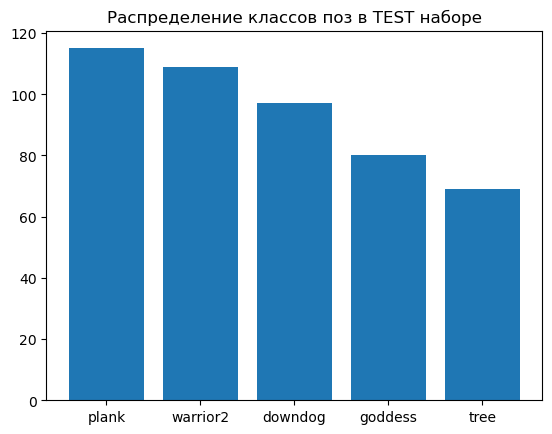

In [77]:
# Вывод характеристик датафрейма скелетных моделей тестового набора
print(data_te.info())
#print(data_te.describe())
print(data_te['target'].value_counts())
paint_bar(data_te, 'TEST')
# Отображение гистограммы
plt.show()